<a href="https://colab.research.google.com/github/yohanesnuwara/python-bootcamp-for-geoengineers/blob/master/petroweek_notebooks/petroweek2020_unit3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 3. Production Data Visualization and Decline Curve Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!git clone 'https://github.com/yohanesnuwara/python-bootcamp-for-geoengineers'

Cloning into 'python-bootcamp-for-geoengineers'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 162 (delta 3), reused 0 (delta 0), pack-reused 153
Receiving objects: 100% (162/162), 2.21 MiB | 4.31 MiB/s, done.
Resolving deltas: 100% (76/76), done.


## Loading BHP data

The BHP (borehole pressure) that we'll use here is `BHP Data.csv`. It's  available under directory `data`. Using the same way that we've learnt in previous session, now we load the data. 

In [ ]:
bhp_csv = '/content/python-bootcamp-for-geoengineers/data/BHP Data.csv'

bhp_data = pd.read_csv(bhp_csv)
bhp_data.head(10)

,Date,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Unnamed: 16
0,1997-11-06,NaN,0.0,NaN,0.0,236.13,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,1997-11-07,NaN,0.0,NaN,0.0,220.18,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,1997-11-08,NaN,0.0,NaN,0.0,210.78,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,1997-11-09,NaN,0.0,NaN,0.0,208.19,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,1997-11-10,NaN,0.0,NaN,0.0,205.80,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
5,1997-11-11,NaN,0.0,NaN,0.0,205.74,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
6,1997-11-12,NaN,0.0,NaN,0.0,205.58,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
7,1997-11-13,NaN,0.0,NaN,0.0,205.18,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
8,1997-11-14,NaN,0.0,NaN,0.0,198.00,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
9,1997-11-15,NaN,0.0,NaN,0.0,212.68,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


### Data QC: Convert to Datetime Format

Check the date column first, check its `dtype`. Here `dtype` is `object`.

In [ ]:
bhp_data['Date']

0       1997-11-06
1       1997-11-07
2       1997-11-08
3       1997-11-09
4       1997-11-10
           ...    
4665           NaN
4666           NaN
4667           NaN
4668           NaN
4669           NaN
Name: Date, Length: 4670, dtype: object

We need to convert `object` to `datetime`, so that it will be recognized as date time.

Also, we will delete the `Unnamed` column at the very end.


In [ ]:
# convert date string to Panda datetime format
bhp_data['Date'] =  pd.to_datetime(bhp_data['Date'], format='%Y-%m-%d') # format check web: https://strftime.org/

bhp_data.head(10)

,Date,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Unnamed: 16
0,1997-11-06,NaN,0.0,NaN,0.0,236.13,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,1997-11-07,NaN,0.0,NaN,0.0,220.18,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,1997-11-08,NaN,0.0,NaN,0.0,210.78,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,1997-11-09,NaN,0.0,NaN,0.0,208.19,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,1997-11-10,NaN,0.0,NaN,0.0,205.80,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
5,1997-11-11,NaN,0.0,NaN,0.0,205.74,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
6,1997-11-12,NaN,0.0,NaN,0.0,205.58,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
7,1997-11-13,NaN,0.0,NaN,0.0,205.18,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
8,1997-11-14,NaN,0.0,NaN,0.0,198.00,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
9,1997-11-15,NaN,0.0,NaN,0.0,212.68,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


Now, the `Unnamed` has been deleted, and the date column has been in `datetime`

In [ ]:
bhp_data['Date']

0      1997-11-06
1      1997-11-07
2      1997-11-08
3      1997-11-09
4      1997-11-10
          ...    
4665          NaT
4666          NaT
4667          NaT
4668          NaT
4669          NaT
Name: Date, Length: 4670, dtype: datetime64[ns]

### Display BHP data

Now let us visualize the BHP of three wells: F, J, K. 

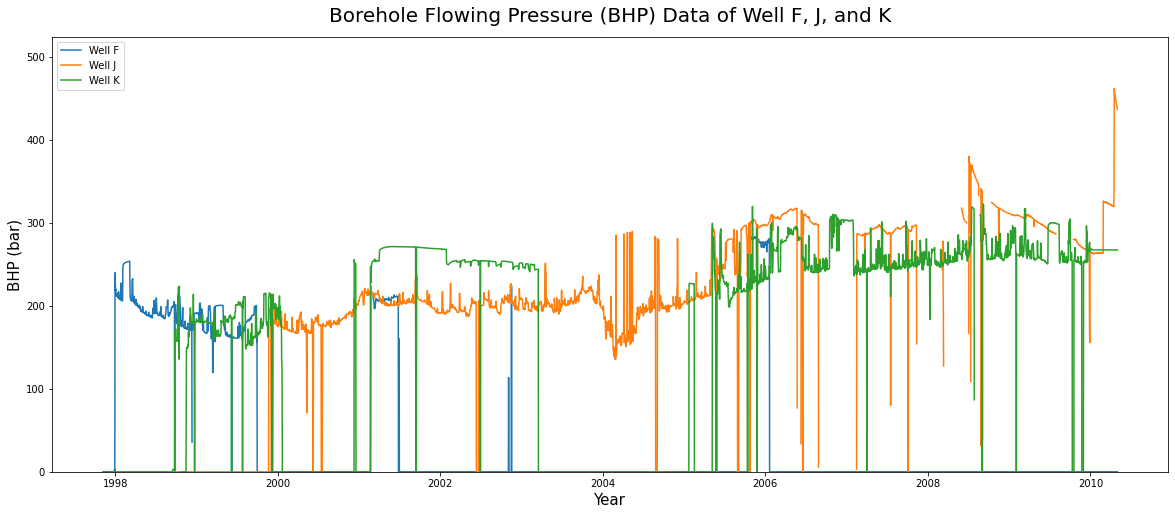

In [ ]:
plt.figure(figsize=(20,8))

plt.plot(bhp_data['Date'], bhp_data['F'], label='Well F')
plt.plot(bhp_data['Date'], bhp_data['J'], label='Well J')
plt.plot(bhp_data['Date'], bhp_data['K'], label='Well K')

plt.title('Borehole Flowing Pressure (BHP) Data of Well F, J, and K', size=20, pad=15)
plt.xlabel('Year', size=15)
plt.ylabel('BHP (bar)', size=15)
plt.ylim(ymin=0)
plt.legend()
plt.show()

In this training, we'll use one well only, Well F.

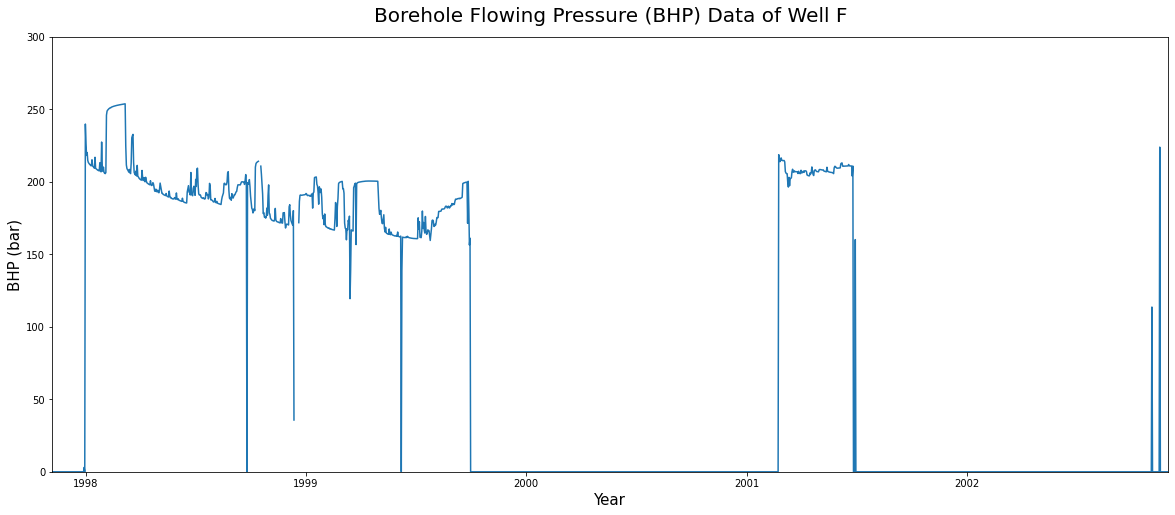

In [ ]:
plt.figure(figsize=(20,8))

plt.plot(bhp_data['Date'], bhp_data['F'])

plt.title('Borehole Flowing Pressure (BHP) Data of Well F', size=20, pad=15)
plt.xlabel('Year', size=15)
plt.ylabel('BHP (bar)', size=15)
plt.xlim(min(bhp_data['Date']), np.datetime64('2002-12-01'))
plt.ylim(0, 300)
plt.show()

## Loading Production rate data

Now we'll upload another data, the production rate data. It contains data of well from E to H, each contains water, oil, and gas production rate. 

In [ ]:
rate_csv = '/content/python-bootcamp-for-geoengineers/data/Production Rate Well E to H.csv'

rate_data = pd.read_csv(rate_csv)
rate_data.head(10)

,DATE,Gas Rate E,Oil Rate E,Water Rate E,Gas Rate F,Oil Rate F,Water Rate F,Gas Rate G,Oil Rate G,Water Rate G,Gas Rate H,Oil Rate H,Water Rate H
0,06/11/1997,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,07/11/1997,482594.69,4347.70,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22/11/1997,634722.75,5601.95,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,09/12/1997,651415.00,5433.42,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24/12/1997,693727.75,5481.02,0.0,17973.92,161.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,11/01/1998,703808.31,5169.75,0.0,681178.94,5923.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,11/02/1998,53044.25,370.62,0.0,59855.40,465.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,07/03/1998,563920.38,3487.88,0.0,643627.25,3719.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,30/03/1998,772098.50,4638.90,0.0,1048260.30,5699.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,31/03/1998,906735.00,5427.25,0.0,1057381.40,5702.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data QC: Convert to Datetime Format

Now we do the same thing, converting to datetime. Recognize the date type, and convert. 

In [ ]:
# convert date string to Panda datetime format
rate_data['DATE'] =  pd.to_datetime(rate_data['DATE'], format='%d/%m/%Y') # format check web: https://strftime.org/

rate_data.head(10)

,DATE,Gas Rate E,Oil Rate E,Water Rate E,Gas Rate F,Oil Rate F,Water Rate F,Gas Rate G,Oil Rate G,Water Rate G,Gas Rate H,Oil Rate H,Water Rate H
0,1997-11-06,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1997-11-07,482594.69,4347.70,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1997-11-22,634722.75,5601.95,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1997-12-09,651415.00,5433.42,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1997-12-24,693727.75,5481.02,0.0,17973.92,161.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1998-01-11,703808.31,5169.75,0.0,681178.94,5923.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1998-02-11,53044.25,370.62,0.0,59855.40,465.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1998-03-07,563920.38,3487.88,0.0,643627.25,3719.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1998-03-30,772098.50,4638.90,0.0,1048260.30,5699.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1998-03-31,906735.00,5427.25,0.0,1057381.40,5702.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Display Production rate data

Different from the display of BHP data, we commonly display production rate data in a **step-like manner**. Instead of `plt.plot`, we use `plt.step`

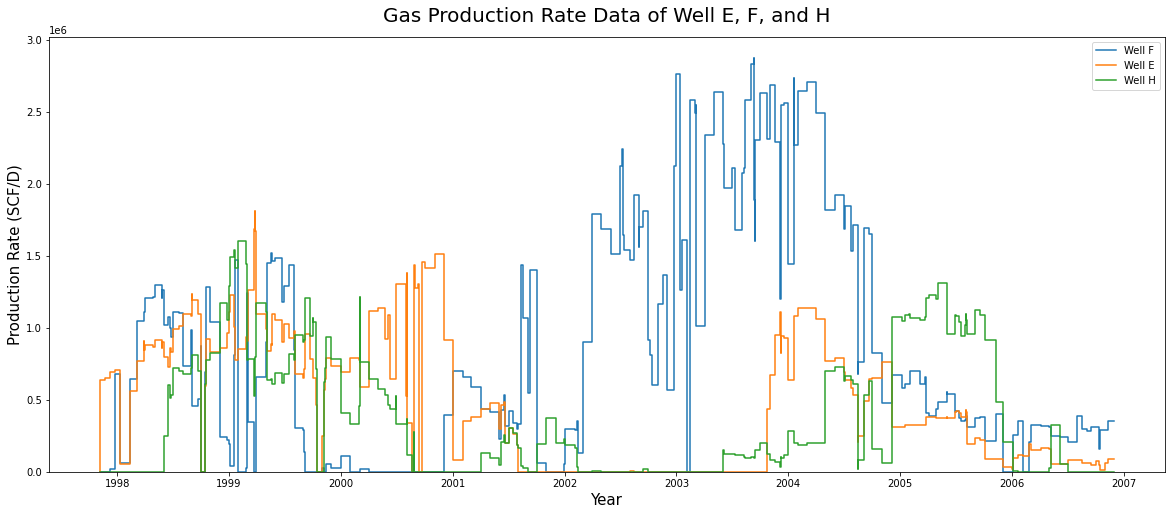

In [ ]:
plt.figure(figsize=(20,8))

plt.step(rate_data['DATE'], rate_data['Gas Rate F'], label='Well F')
plt.step(rate_data['DATE'], rate_data['Gas Rate E'], label='Well E')
plt.step(rate_data['DATE'], rate_data['Gas Rate H'], label='Well H')

plt.title('Gas Production Rate Data of Well E, F, and H', size=20, pad=15)
plt.xlabel('Year', size=15)
plt.ylabel('Production Rate (SCF/D)', size=15)
plt.legend()
plt.ylim(ymin=0)

plt.show()

For DCA, in this training also we'll only use well F. 

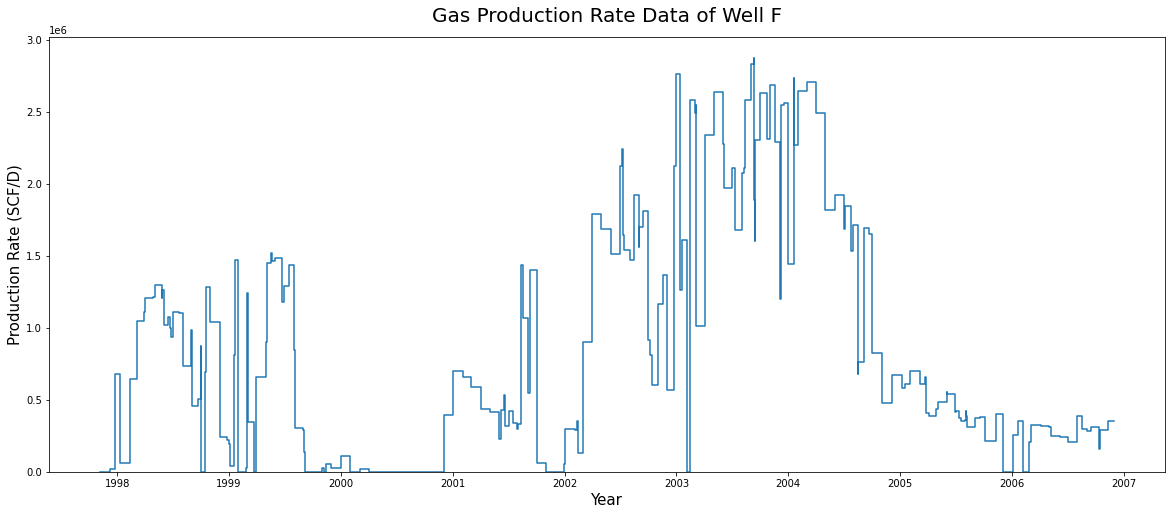

In [ ]:
plt.figure(figsize=(20,8))

plt.step(rate_data['DATE'], rate_data['Gas Rate F'], label='Well F')

plt.title('Gas Production Rate Data of Well F', size=20, pad=15)
plt.xlabel('Year', size=15)
plt.ylabel('Production Rate (SCF/D)', size=15)
plt.ylim(ymin=0)
plt.show()

## Zoom into data of interesting target for analysis (PTA and DCA)

We can zoom in into an interesting target in our data (in the display), simply by configuring `plt.xlim` and specify the date. 

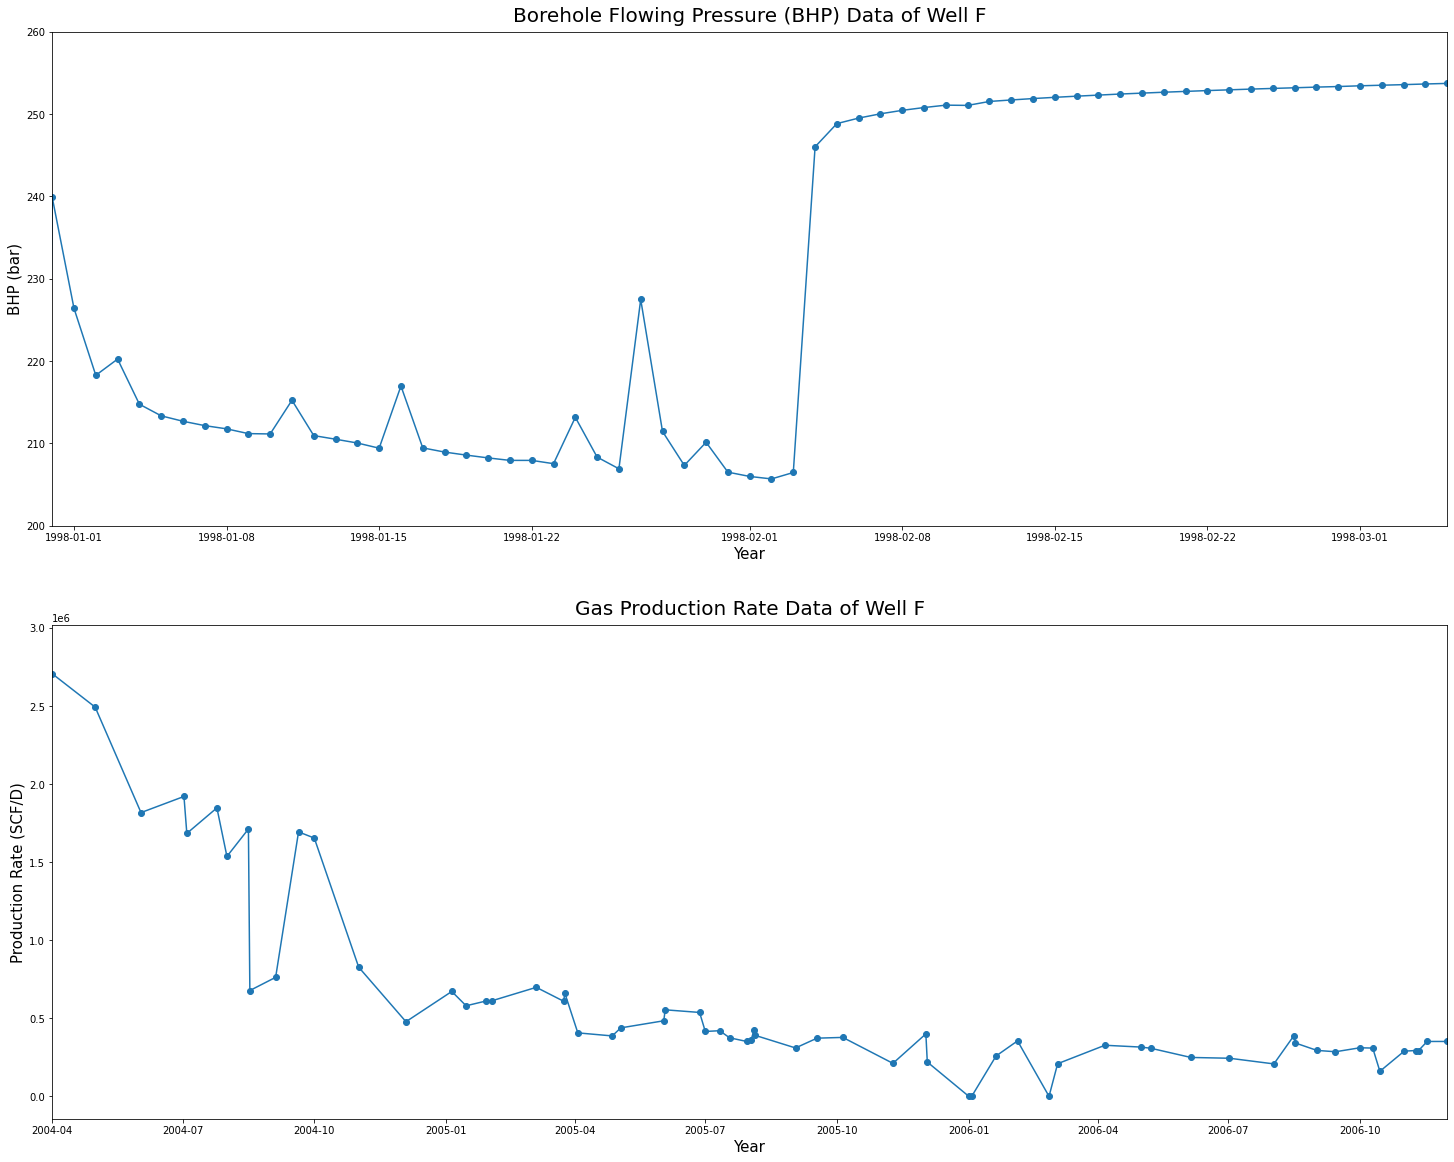

In [ ]:
plt.figure(figsize=(25,20))

plt.subplot(2,1,1)
plt.plot(bhp_data['Date'], bhp_data['F'], 'o-')
plt.title('Borehole Flowing Pressure (BHP) Data of Well F', size=20, pad=10)
plt.xlabel('Year', size=15)
plt.ylabel('BHP (bar)', size=15)
plt.xlim(np.datetime64('1997-12-31'), np.datetime64('1998-03-05'))
plt.ylim(200, 260)

plt.subplot(2,1,2)
plt.plot(rate_data['DATE'], rate_data['Gas Rate F'], 'o-')
plt.title('Gas Production Rate Data of Well F', size=20, pad=10)
plt.xlabel('Year', size=15)
plt.ylabel('Production Rate (SCF/D)', size=15)
plt.xlim(np.datetime64('2004-04-01'), max(rate_data['DATE'].values))
# plt.xlim(np.datetime64('1997-12-31'), np.datetime64('1998-03-05'))
# plt.ylim(200, 260)

plt.show()

## Decline Curve Analysis (without removing outliers)

From the curve above, we'll select date for DCA, started from 1 April 2004 to date (end of the data).

Originally, we slice the data. But as for now, the sliced data has been prepared for you. Let's directly load it. 

In [ ]:
df = pd.read_csv('/content/python-bootcamp-for-geoengineers/data/norne_production_rate_sample.csv')

# convert date string to Panda datetime format
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d') 

t = df['Date']
q = df['Rate (SCF/d)']

Because in DCA we need the time axis displayed as days from 0 to $N$, we need to convert it. Use the following script. 

In [ ]:
import datetime

# subtract one datetime to another datetime
timedelta = [j-i for i, j in zip(t[:-1], t[1:])]
timedelta = np.array(timedelta)
timedelta = timedelta / datetime.timedelta(days=1)

# take cumulative sum over timedeltas
t = np.cumsum(timedelta)
t = np.append(0, t)
t = t.astype(float)

Now plot the production rate data

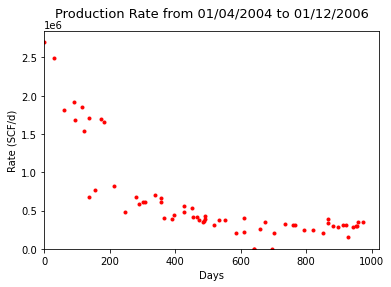

In [ ]:
plt.plot(t, q, '.', color='red')
plt.title('Production Rate from 01/04/2004 to 01/12/2006', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Rate (SCF/d)')
plt.xlim(xmin=0); plt.ylim(ymin=0)

plt.show()

Next, let's do curve fitting. In curve fitting, it's always recommended to normalize our data. So we normalize our data by dividing each data by its max values.

In [ ]:
# normalize the time and rate data
t_normalized = t / max(t)
q_normalized = q / max(q)

Next, we make the hyperbolic function for DCA.

$$q=\frac{q_i}{(1+b \cdot d_i \cdot t)^{1 / b}}$$

In [ ]:
# function for hyperbolic decline
def hyperbolic(t, qi, di, b):
  return qi / (np.abs((1 + b * di * t))**(1/b))

Let's start fitting. In curve-fitting, we can use `Scipy` package, from that we import `curve_fit`. 

In [ ]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(hyperbolic, t_normalized, q_normalized)
popt

array([1.05921107, 6.51659042, 0.50002664])

Because we had fitted on the normalized data, we need to denormalize our fitted parameters. Here's the equation that we'll use:

$$q=\frac{q_i \cdot q_{max}}{(1+b \cdot \frac{d_i}{t_{max}} \cdot t)^{1 / b}}$$

In [ ]:
qi, di, b = popt

# de-normalize qi and di
qi = qi * max(q)
di = di / max(t)

print('Initial production rate:', np.round(qi, 3), 'SCF')
print('Initial decline rate:', np.round(di, 3), 'SCF/D')
print('Decline coefficient:', np.round(b, 3))

Initial production rate: 2866266.453 SCF
Initial decline rate: 0.007 SCF/D
Decline coefficient: 0.5


Let's now forecast what will be our production rate until 1,500 days!

In [ ]:
# forecast gas rate until 1,500 days
t_forecast = np.arange(1501)
q_forecast = hyperbolic(t_forecast, qi, di, b)

Finally, we plot our DCA result.

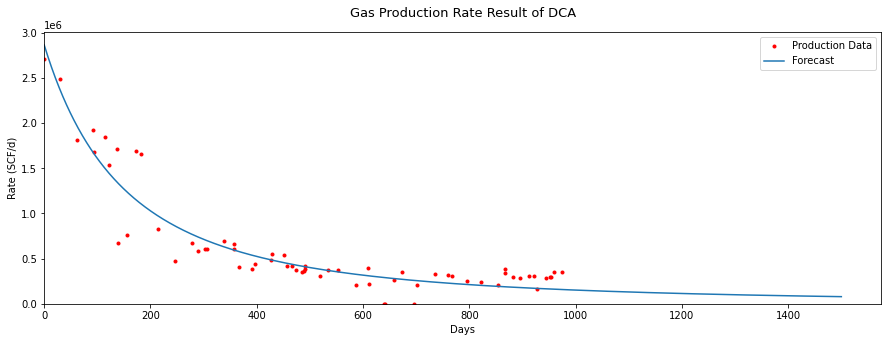

In [ ]:
# plot the production data with the forecasts (rate and cum. production)
plt.figure(figsize=(15,5))

plt.plot(t, q, '.', color='red', label='Production Data')
plt.plot(t_forecast, q_forecast, label='Forecast')
plt.title('Gas Production Rate Result of DCA', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Rate (SCF/d)')
plt.xlim(xmin=0); plt.ylim(ymin=0)
plt.legend()

plt.show()